In [61]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [62]:
model = pd.read_csv("Mall_customers.csv")
model.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
imputer = SimpleImputer(strategy='mean')
model = model.rename(columns={
    'Age': 'age',
    'Annual Income (k$)': 'revenu_annuel',
    'Spending Score (1-100)': 'score_depense'
})
X = model[['age','revenu_annuel','score_depense']]
X_imputed = imputer.fit_transform(X)


In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

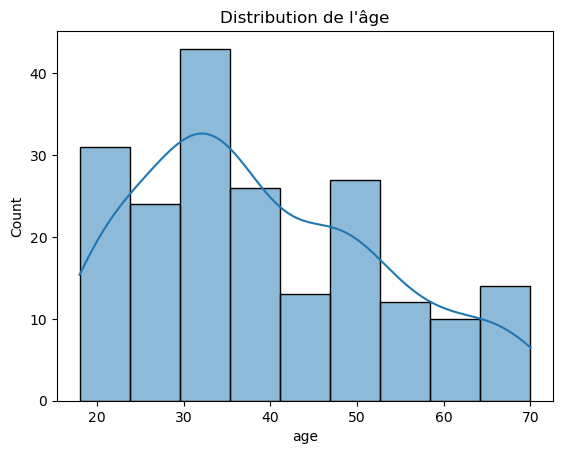

In [65]:
sns.histplot(data=model, x='age', kde=True)
plt.title("Distribution de l'âge")
plt.show()

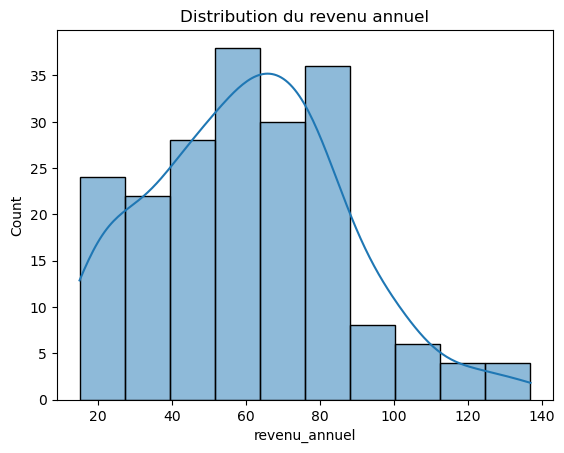

In [66]:
sns.histplot(data=model, x='revenu_annuel', kde=True)
plt.title("Distribution du revenu annuel")
plt.show()

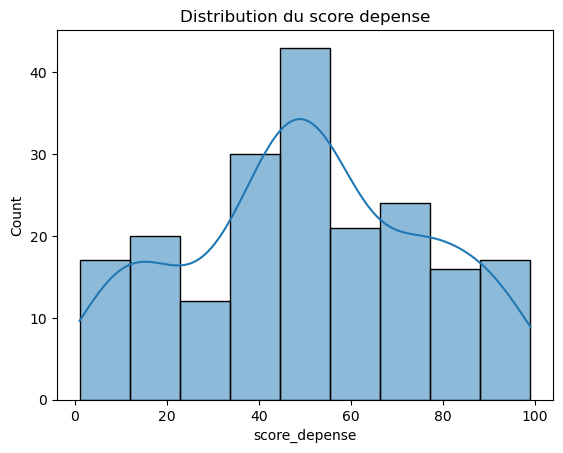

In [67]:
sns.histplot(data=model, x='score_depense', kde=True)
plt.title("Distribution du score depense")
plt.show()

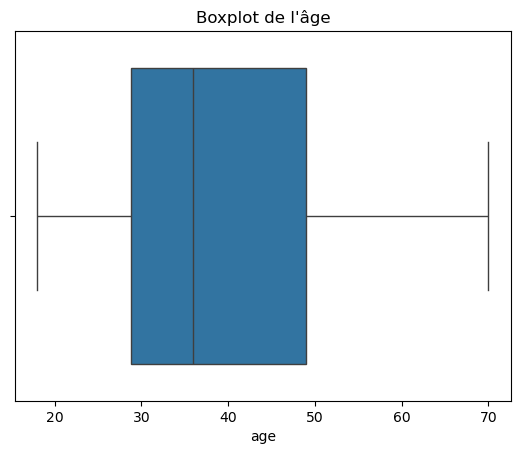

In [68]:
sns.boxplot(data=model, x='age')
plt.title("Boxplot de l'âge")
plt.show()

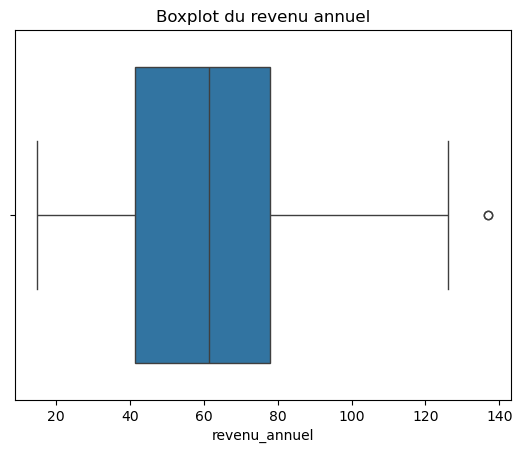

In [69]:
sns.boxplot(data=model, x='revenu_annuel')
plt.title("Boxplot du revenu annuel")
plt.show()

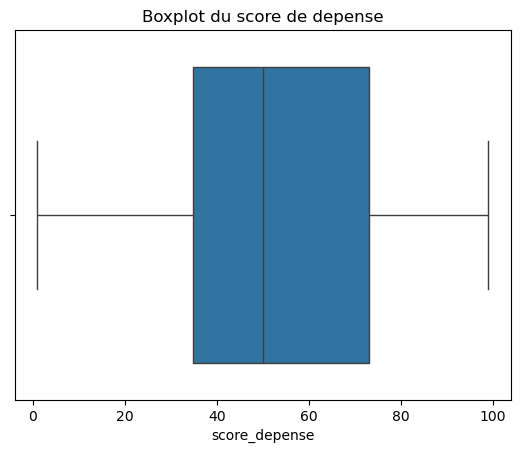

In [70]:
sns.boxplot(data=model, x='score_depense')
plt.title("Boxplot du score de depense")
plt.show()

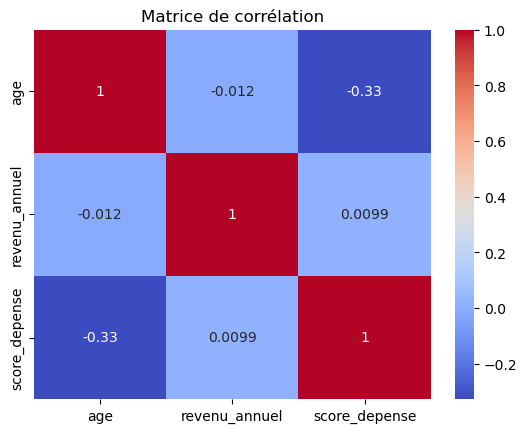

In [71]:
#Matrice de correlation
correlation_matrix = model[['age', 'revenu_annuel', 'score_depense']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


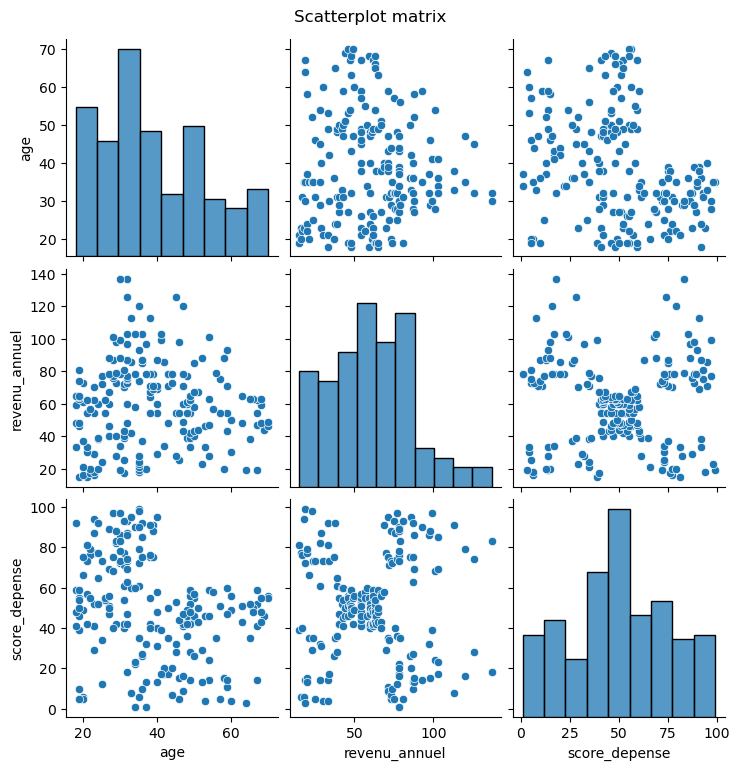

In [72]:
#Scatterplot matrix
sns.pairplot(model[['age', 'revenu_annuel', 'score_depense']])
plt.suptitle("Scatterplot matrix", y=1.02)
plt.show()

In [73]:
#Supprimer colonne inutile
model = model.drop(columns=['CustomerID'])
model.head()

,Gender,age,revenu_annuel,score_depense
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [74]:
model['classe_age'] = pd.cut(model['age'], bins=[0, 25, 40, 60, 100], labels=['jeune', 'adulte', 'mature', 'senior'])
model.head()

,Gender,age,revenu_annuel,score_depense,classe_age
0,Male,19,15,39,jeune
1,Male,21,15,81,jeune
2,Female,20,16,6,jeune
3,Female,23,16,77,jeune
4,Female,31,17,40,adulte


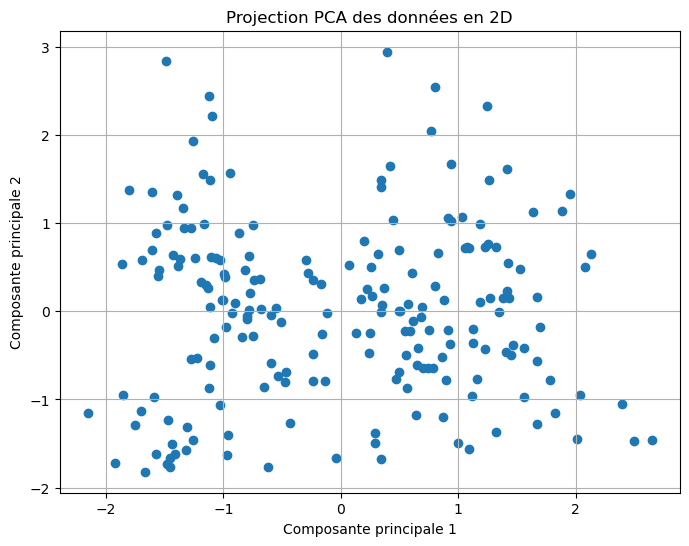

In [75]:
# Appliquer la PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Les nouvelles colonnes sont des "composantes principales"
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Affichage du scatterplot
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projection PCA des données en 2D')
plt.grid(True)
plt.show()

C:\Users\Miora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


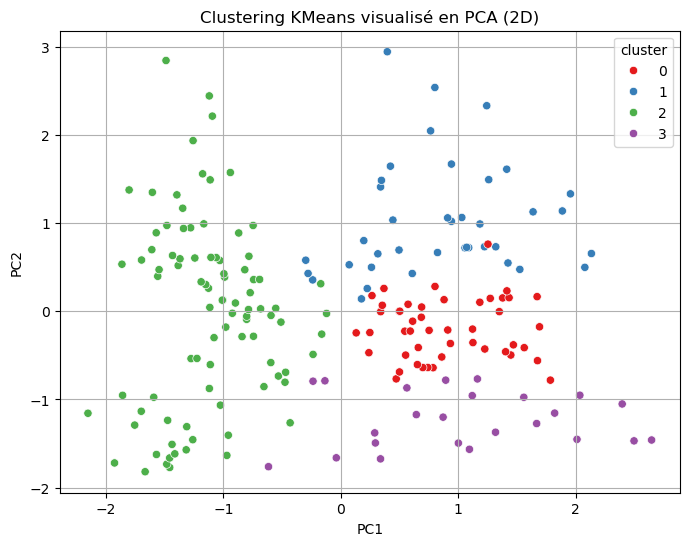

In [99]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)

# Appliquer le clustering sur les données standardisées
kmeans.fit(X_scaled)

# Récupérer les labels des clusters
labels = kmeans.labels_

# Ajouter les labels des clusters à df_pca
df_pca['cluster'] = labels
#model.groupby('cluster')[['age', 'revenu_annuel', 'score_depense']].mean()
#model[model['cluster'] == 0].head()


plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title('Clustering KMeans visualisé en PCA (2D)')
plt.grid(True)
plt.show()

In [97]:
model['cluster'] = labels
model.groupby('cluster')[['age', 'revenu_annuel', 'score_depense']].mean()

,age,revenu_annuel,score_depense
cluster,,,
0,55.638298,54.382979,48.851064
1,39.871795,86.102564,19.358974
2,28.500000,61.677778,71.766667
3,43.125000,26.958333,22.083333


Interpretation:
 - Pour les personnes agés c'est à dire 55ans et plus, ont un revenu annuel élevé et un score de depense moderé, ces personnes la ont une
   consommation equilibré (cluster 0)
 - Pour les personnes moyenement agé (40ans) le revenu annuel très élevé et un score de depense faible, ce sont des personnes qui n'achetent que le necessaire, fort pouvoir d'achat mais peu depensier (cluster 1)
 - Pour les personnes jeunes (28ans) ont un revenu annuel élevé mais un score de depense plus élevé que son revenu, ce sont des acheteur compulsif qui sont des cibles très interessant (Cluster 2)
 - Pour les personne d'age moyenne (43 ans) alors le revenu annuel est faible ainsi que son score de depense, donc ce sont des client qui ont un pouvoir d'achat pas très élevé donc il sont plus interessé par les promotions et les offres economique (Cluster 3)
